### aim: 

### date: 

In [34]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [35]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [36]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
# plt.rcParams.update({'font.size': 12})
# font = {'family' : 'normal',
# 'weight' : 'normal',
# 'size'   : 12}

# plt.rc('font', **font)

In [37]:
scendict = {
    # Baynes Sound
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}

In [38]:
scens = ['1A','1B','2A','2B','3A','3B']

def get_dslist(tscen):
    print(f'SCENARIO {tscen}')
    dslist = []

    for y in range(1950,2100):
        if ((y<1990) & ((tscen == '3A') | (tscen == '3B'))):
            tstr = scendict['1A']['hist_str']
        elif y<2015:
            tstr = scendict[tscen]['hist_str']

        else:
            tstr = scendict[tscen]['fut_str']

        try:
            td = glob.glob(f'/gpfs/data/greenocean/software/resources/MEDUSA/PROC2/medusa*{tstr}*{y}_diad-T-aux.nc')
            dslist.append(td[0])
        except:
            print(f'FAIL {tscen},{tstr}, {y}')
    return dslist

dsl1A = get_dslist('1A')
dsl1B = get_dslist('1B')
dsl2A = get_dslist('2A')
dsl2B = get_dslist('2B')
dsl3A = get_dslist('3A')
dsl3B = get_dslist('3B')

SCENARIO 1A
SCENARIO 1B
SCENARIO 2A
SCENARIO 2B
SCENARIO 3A
SCENARIO 3B


['/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/SUMMARY_cflx_TOM12_TJ_1ASA_1948-2100.nc']
['/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/SUMMARY_cflx_TOM12_TJ_1BSA_1948-2100.nc']
['/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/SUMMARY_cflx_TOM12_TJ_3ASA_1948-2100.nc']
['/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/SUMMARY_cflx_TOM12_TJ_3BSA_1948-2100.nc']
['/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/SUMMARY_cflx_TOM12_TJ_2ASA_1948-2100.nc']
['/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/SUMMARY_cflx_TOM12_TJ_2BSA_1948-2100.nc']


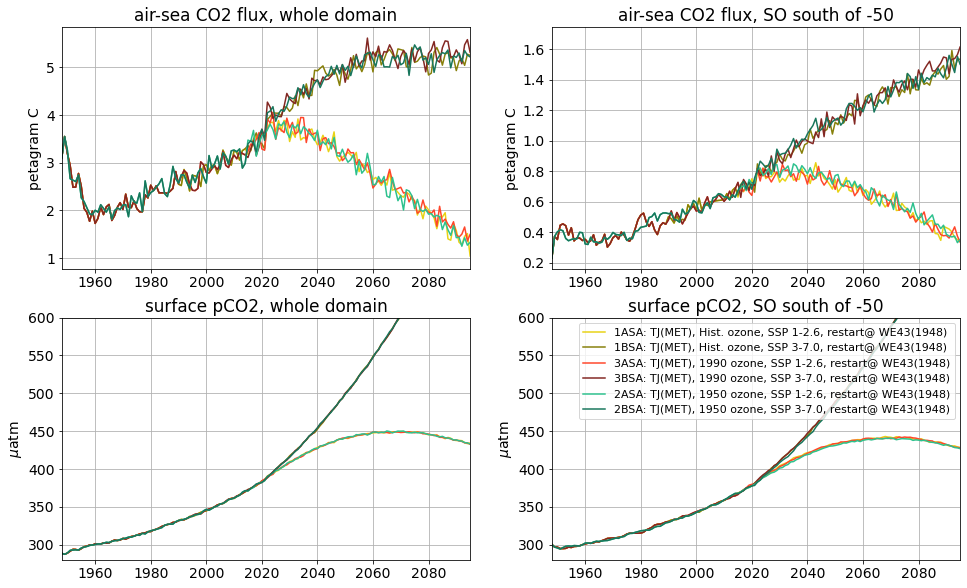

In [40]:
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
import scendict as sc
import breakdown as bp
import plotr as pr
### open the datasets
import plotr as pr
reload(pr)

sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'

tms = ['TOM12_TJ_1ASA','TOM12_TJ_1BSA', 'TOM12_TJ_3ASA', 'TOM12_TJ_3BSA',\
          'TOM12_TJ_2ASA', 'TOM12_TJ_2BSA']


descs = ['1ASA: TJ(MET), Hist. ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '1BSA: TJ(MET), Hist. ozone, SSP 3-7.0, restart@ WE43(1948)',\
         '3ASA: TJ(MET), 1990 ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '3BSA: TJ(MET), 1990 ozone, SSP 3-7.0, restart@ WE43(1948)',\
         '2ASA: TJ(MET), 1950 ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '2BSA: TJ(MET), 1950 ozone, SSP 3-7.0, restart@ WE43(1948)',\
         'DW_WE43: DW(ERA5) DW_WE43 with GOC limit OFF',\
         'TJ_WE43: TJ(ERA5), rerun of DW_WE43 with GOC limit ON',\

         'GA01: DW(NCEP), GCB run']#descriptions of models in tm
cols = [sc.scen['1A']['color'],\
        sc.scen['1B']['color'],\
        sc.scen['3A']['color'],\
        sc.scen['3B']['color'],\
        sc.scen['2A']['color'],\
        sc.scen['2B']['color'],\
        'grey', 'g', 'b']

linestyles = ['-','-','-','-','-','-','-','-','-']
dsets = []
fnam = 'Cflx_comparison_1-3.png' ## filename for resulting plot

# for tm in tms:
#     w = glob.glob(f'{sdir}*SUMMARY*{tm}*')
#     ds = xr.open_dataset(w[0])
#     dsets.append(ds)
# pr.plot_carbon(dsets, cols, descs, linestyles, sdir, fnam, tstart = 1948, tend = 2100, tendatm = 900)

sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'
sdir2 = '/gpfs/home/mep22dku/scratch/SOZONE/uploadPics/'
fnam = 'CFLX_SA_runs.jpg'
reload(pr)
graph = True
if graph:
    dsets = []

    for tm in tms:
        w = glob.glob(f'{sdir}*SUMMARY*{tm}*')
        print(w)
        ds = xr.open_dataset(w[0])
        dsets.append(ds)
    pr.plot_carbon(dsets, cols, descs, linestyles, sdir2, fnam, tstart = 1948, tend = 2095, tendatm = 600)


## badly commented

In [64]:

MEDUSA_PgC_1A = pickle.load(open('./EXTRACT/MEDUSA_PgC_1A.pkl', 'rb'))
MEDUSA_PgC_1B = pickle.load(open('./EXTRACT/MEDUSA_PgC_1B.pkl', 'rb'))
MEDUSA_PgC_2A = pickle.load(open('./EXTRACT/MEDUSA_PgC_2A.pkl', 'rb'))
MEDUSA_PgC_2B = pickle.load(open('./EXTRACT/MEDUSA_PgC_2B.pkl', 'rb'))
MEDUSA_PgC_3A = pickle.load(open('./EXTRACT/MEDUSA_PgC_3A.pkl', 'rb'))
MEDUSA_PgC_3B = pickle.load(open('./EXTRACT/MEDUSA_PgC_3B.pkl', 'rb'))

MEDUSA_SOPgC_1A = pickle.load(open('./EXTRACT/MEDUSA_SOPgC_1A.pkl', 'rb'))
MEDUSA_SOPgC_1B = pickle.load(open('./EXTRACT/MEDUSA_SOPgC_1B.pkl', 'rb'))
MEDUSA_SOPgC_2A = pickle.load(open('./EXTRACT/MEDUSA_SOPgC_2A.pkl', 'rb'))
MEDUSA_SOPgC_2B = pickle.load(open('./EXTRACT/MEDUSA_SOPgC_2B.pkl', 'rb'))
MEDUSA_SOPgC_3A = pickle.load(open('./EXTRACT/MEDUSA_SOPgC_3A.pkl', 'rb'))
MEDUSA_SOPgC_3B = pickle.load(open('./EXTRACT/MEDUSA_SOPgC_3B.pkl', 'rb'))

tdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'
tom1A = xr.open_dataset(f'{tdir}SUMMARY_cflx_TOM12_TJ_1ASA_1948-2100.nc')
SOPgC_1A = tom1A.cflx_so[3:153].values
tom1B = xr.open_dataset(f'{tdir}SUMMARY_cflx_TOM12_TJ_1BSA_1948-2100.nc')
SOPgC_1B = tom1B.cflx_so[3:153].values

tom2A = xr.open_dataset(f'{tdir}SUMMARY_cflx_TOM12_TJ_2ASA_1948-2100.nc')
SOPgC_2A = tom2A.cflx_so[3:153].values
tom2B = xr.open_dataset(f'{tdir}SUMMARY_cflx_TOM12_TJ_2BSA_1948-2100.nc')
SOPgC_2B = tom2B.cflx_so[3:153].values

tom3A = xr.open_dataset(f'{tdir}SUMMARY_cflx_TOM12_TJ_3ASA_1948-2100.nc')
SOPgC_3A = tom3A.cflx_so[3:153].values
tom3B = xr.open_dataset(f'{tdir}SUMMARY_cflx_TOM12_TJ_3BSA_1948-2100.nc')
SOPgC_3B = tom3B.cflx_so[3:153].values



Text(0.5, 1.0, 'Southern Ocean CO$_2$ sink (-90 - -50 $^{\\circ}$S)')

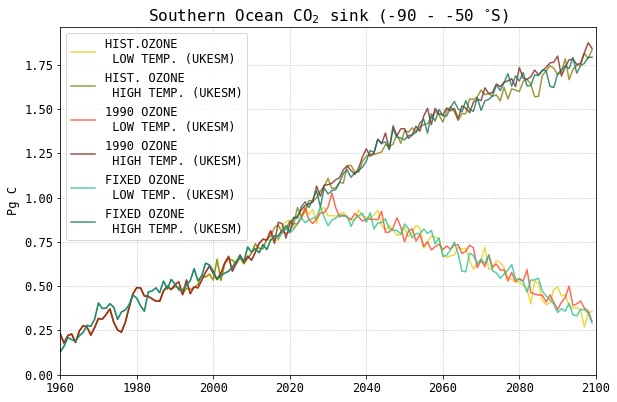

In [65]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'size'   : 12}


plt.rc('font', **font)

cols = [sc.scen['1A']['color'],\
        sc.scen['1B']['color'],\
        sc.scen['3A']['color'],\
        sc.scen['3B']['color'],\
        sc.scen['2A']['color'],\
        sc.scen['2B']['color'],]

labs = [sc.scen['1A']['name'],\
        sc.scen['1B']['name'],\
        sc.scen['3A']['name'],\
        sc.scen['3B']['name'],\
        sc.scen['2A']['name'],\
        sc.scen['2B']['name'],]

tplt = [SOPgC_1A, SOPgC_1B, SOPgC_3A, SOPgC_3B, SOPgC_2A, SOPgC_2B]
tplt2 = [MEDUSA_SOPgC_1A, MEDUSA_SOPgC_1B, MEDUSA_SOPgC_3A, MEDUSA_SOPgC_3B, MEDUSA_SOPgC_2A, MEDUSA_SOPgC_2B]
fact = 0.8
fig, axs = plt.subplots(1,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')


# axs = axs.ravel()
yrs = np.arange(1950,2100,1)
for i in range(0,6):
    
    axs.plot(yrs, tplt2[i], color = cols[i], alpha = 0.8, label = f'{labs[i]} (UKESM)')
    #axs.plot(yrs, tplt[i], color = cols[i], linewidth = 3,)
    
axs.set_xlim([1960,2100])
axs.grid(linestyle = ':', color = 'grey', alpha = 0.6)
axs.legend()
axs.set_ylabel('Pg C')
axs.set_title('Southern Ocean CO$_2$ sink (-90 - -50 $^{\circ}$S)', fontsize = 16)

In [66]:
tdir = '/gpfs/data/greenocean/software/resources/windsProcessed'

wspd_1A = xr.open_dataset(f'{tdir}/wspd_1A_overwatermean-50N.nc')
wspd_1B = xr.open_dataset(f'{tdir}/wspd_1B_overwatermean-50N.nc')
wspd_2A = xr.open_dataset(f'{tdir}/wspd_2A_overwatermean-50N.nc')
wspd_2B = xr.open_dataset(f'{tdir}/wspd_2B_overwatermean-50N.nc')
wspd_3A = xr.open_dataset(f'{tdir}/wspd_3A_overwatermean-50N.nc')
wspd_3B = xr.open_dataset(f'{tdir}/wspd_3B_overwatermean-50N.nc')


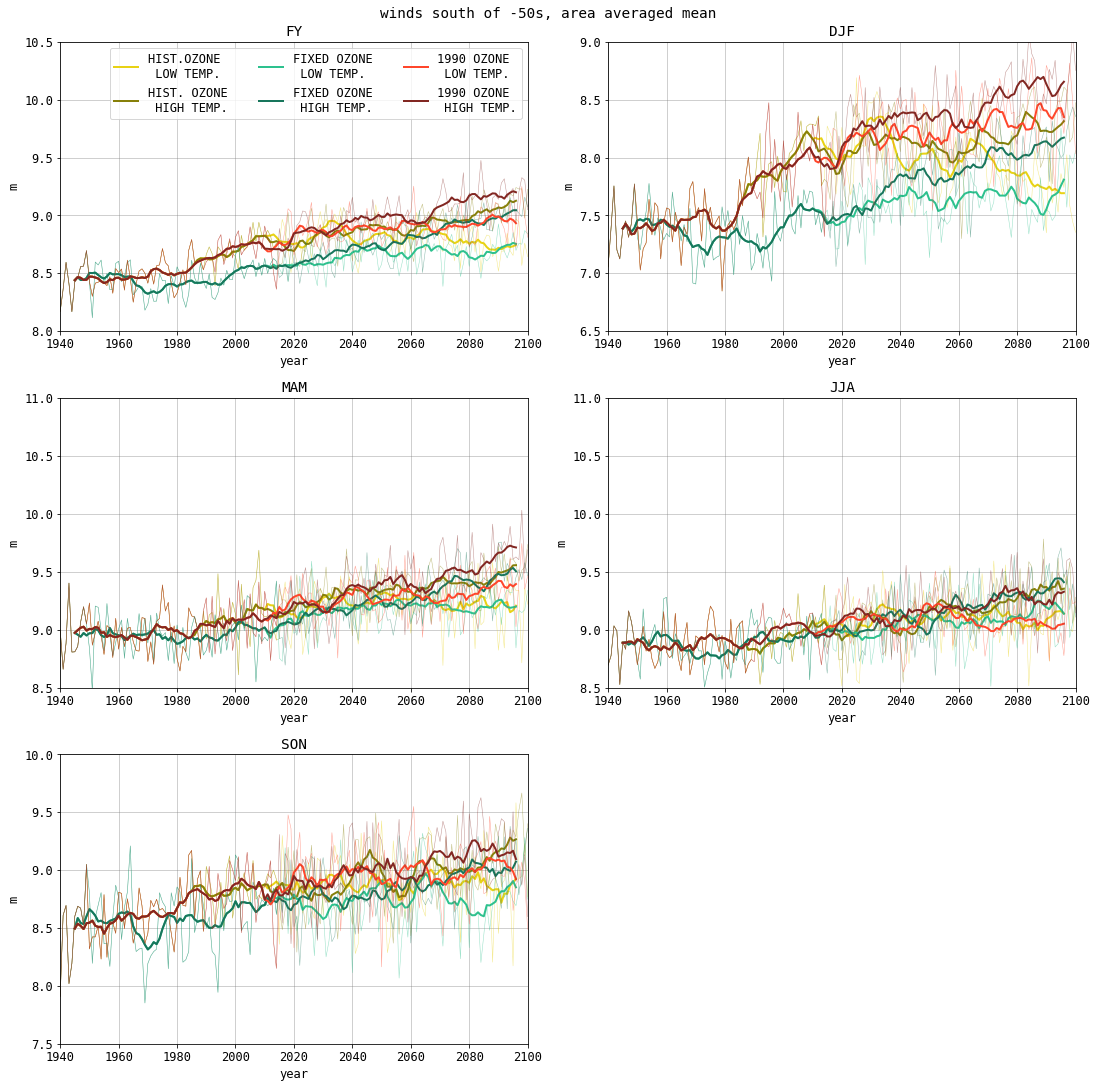

In [67]:
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(14*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
tits = ['FY','DJF','MAM','JJA','SON']
tmins = [8, 6.5, 8.5, 8.5, 7.5]
for i in range(0,5):
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('m')
    axs[i].set_xlim([1940,2100])
    axs[i].set_ylim([tmins[i],tmins[i]+2.5])
    axs[i].grid(b=True, which='major', color='grey', linestyle='-', linewidth = 0.5, alpha = 0.75)
   
axs[0].legend(ncol = 3, loc = 'best')

for i in range(0,4):
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('m')
    axs[i].set_xlim([1940,2100])
#     axs[i].set_xlabel()

axs[5].axis('off')

plt.suptitle('winds south of -50s, area averaged mean')
plt.tight_layout()
# fig.savefig('./figs/Fig-wspd.jpg')

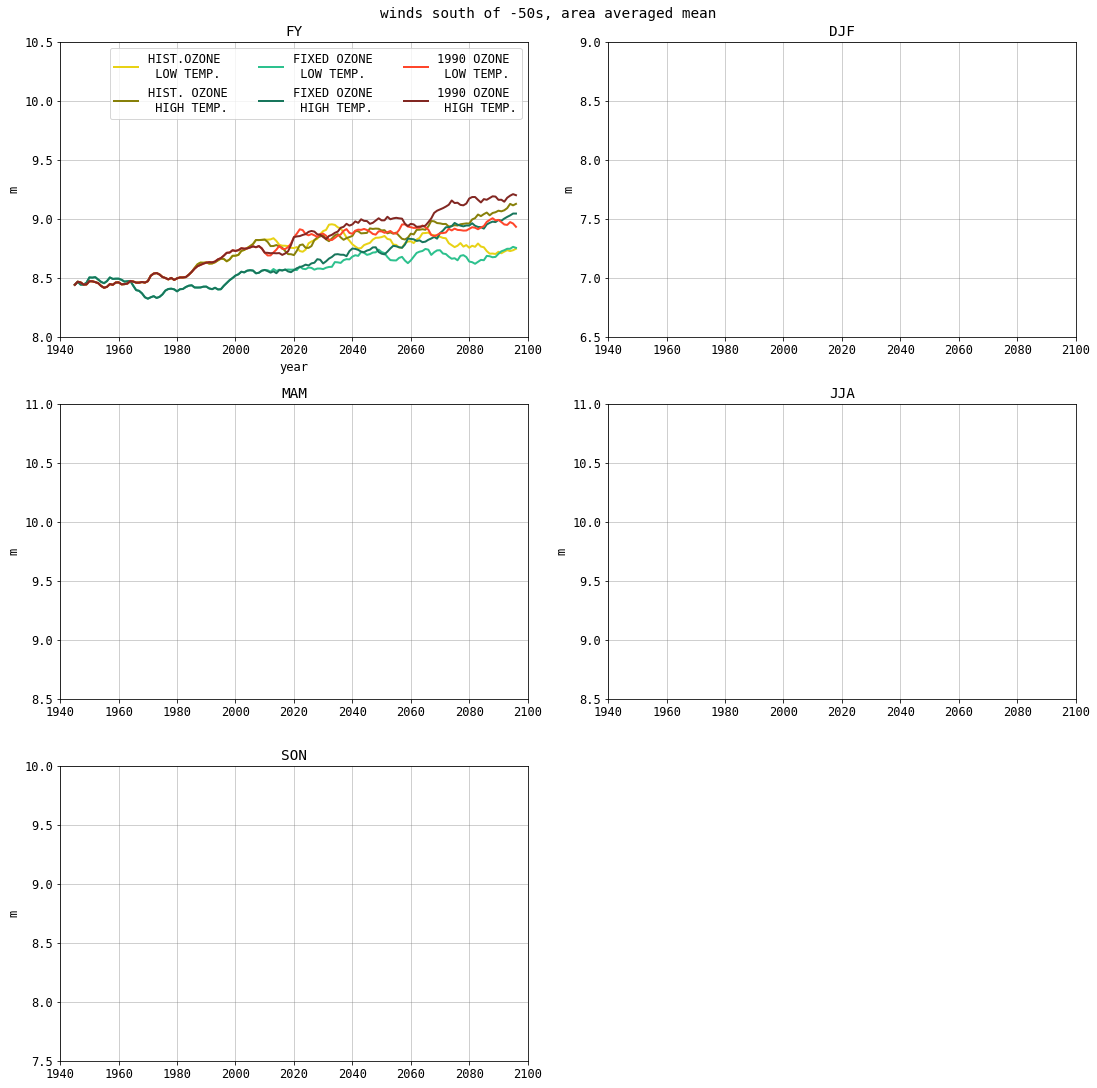

In [77]:
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(14*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
wspd1 = wspd_1A.wspd
wspd2 = wspd_2A.wspd
#     tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
#     tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
#     tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
#     tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
#     tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
#     tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
#     tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     tv.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
#     tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
tits = ['FY','DJF','MAM','JJA','SON']
tmins = [8, 6.5, 8.5, 8.5, 7.5]
for i in range(0,5):
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('m')
    axs[i].set_xlim([1940,2100])
    axs[i].set_ylim([tmins[i],tmins[i]+2.5])
    axs[i].grid(b=True, which='major', color='grey', linestyle='-', linewidth = 0.5, alpha = 0.75)
   
axs[0].legend(ncol = 3, loc = 'best')

for i in range(0,4):
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('m')
    axs[i].set_xlim([1940,2100])
#     axs[i].set_xlabel()

axs[5].axis('off')

plt.suptitle('winds south of -50s, area averaged mean')
plt.tight_layout()
# fig.savefig('./figs/Fig-wspd.jpg')